<a href="https://colab.research.google.com/github/ZahibVentura/Estad-stica/blob/main/Series_Marcianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_excel("SeriesMarcianas.xlsx") #Cargar nuestra base a python

In [3]:
xx = df['serie1']
yy = df['serie2']

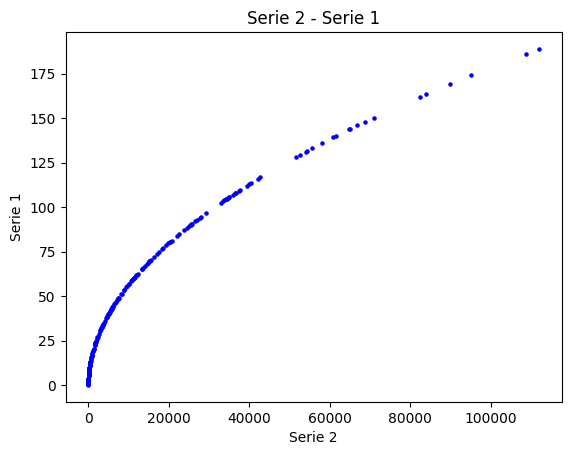

In [4]:
#Graficamos nuestro grafico de dispersión
plt.scatter(yy,xx,s = 5, c = 'b')
plt.title('Serie 1 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('Serie 1')
plt.show()

In [7]:
#Transofrmando nuestros datos, proponemos elevar al cuadrado los datos
df['(serie1)^2'] = (df['serie1'])**(2)

# Añadir una constante (B0)
X = sm.add_constant(df['serie2'])  # Agrega columna de 1's para el intercepto
y = df['(serie1)^2']

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()  # Regresión lineal ordinaria

# Obtener B0 y B1
B0 = modelo.params[0]  # Intercepto
B1 = modelo.params[1]  # Pendiente



<ipython-input-7-de3e10a26e1b>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B0 = modelo.params[0]  # Intercepto
<ipython-input-7-de3e10a26e1b>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  B1 = modelo.params[1]  # Pendiente


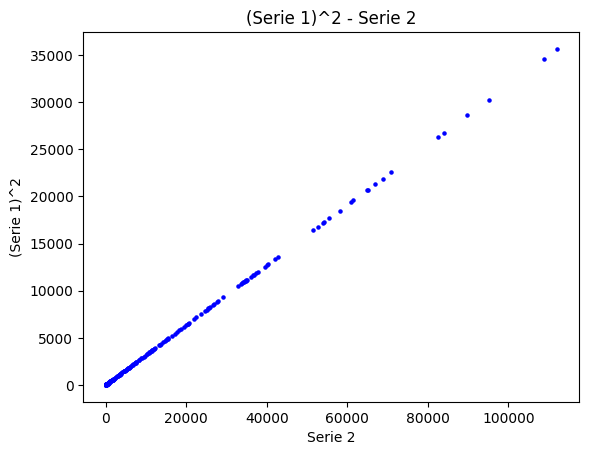

In [17]:
plt.scatter(df['serie2'],df['(serie1)^2'],s = 5, c = 'b')
plt.title('(Serie 1)^2 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('(Serie 1)^2')
plt.show()

In [11]:
#Vemos los valores de B0 y B1
print(f"B0 (Intercepto): {B0:.4f}")
print(f"B1 (Pendiente): {B1:.4f}")

B0 (Intercepto): -0.0000
B1 (Pendiente): 0.3183


In [12]:
#La ecuación de regresión
a = np.linspace(df['serie2'].min(),df['serie2'].max(),1000)
b = B0 + B1*a

In [13]:
#Calculos de los residuos
df['(yi-y_media)^2'] = (df['(serie1)^2']-df['(serie1)^2'].mean())**2
df['y_estimada'] = B0 + B1*df['serie2']
df['(y_estimada-y_media)^2'] = (df['y_estimada']-df['(serie1)^2'].mean())**2
df['u'] = df['(serie1)^2']-df['y_estimada']
df['u^2'] = df['u']**2
print(df)

     Unnamed: 0      serie1        serie2    (serie1)^2  (yi-y_media)^2  \
0           NaN   23.807140   1780.591569    566.779900    1.874199e+07   
1           NaN   69.470820  15161.938195   4826.194821    4.870296e+03   
2           NaN   51.452568   8316.947874   2647.366731    5.056272e+06   
3           NaN    6.774270    144.170005     45.890738    2.352339e+07   
4           NaN    2.154216     14.579023      4.640647    2.392522e+07   
..          ...         ...           ...           ...             ...   
198         NaN   70.276546  15515.675527   4938.792911    1.832746e+03   
199         NaN   70.005047  15396.023873   4900.706607    2.231880e+01   
200         NaN   27.225853   2328.696283    741.247049    1.726183e+07   
201         NaN  104.350301  34208.756434  10888.985367    3.591609e+07   
202         NaN    6.935446    151.111894     48.100410    2.350196e+07   

       y_estimada  (y_estimada-y_media)^2             u           u^2  
0      566.779900          

In [14]:
#Calculo de la R^2 del modo R^2 = SCE / SCTy
R_2 = df['(y_estimada-y_media)^2'].sum() / df['(yi-y_media)^2'].sum()
print(R_2)

1.0


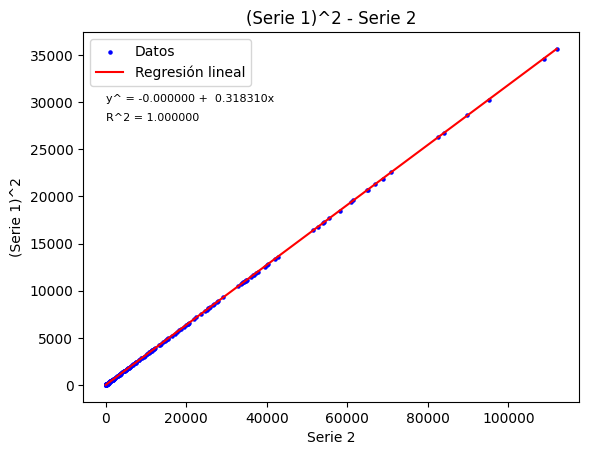

In [34]:
#Graficando la regresión junto a los datos de dispresión
plt.scatter(df['serie2'],df['(serie1)^2'],s = 5, c = 'b')
plt.plot(a,b,color = 'r')
plt.title('(Serie 1)^2 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('(Serie 1)^2')
plt.text(0,30000,f'y^ = {B0:.6f} +  {B1:.6f}x', fontsize=8, color='k')
plt.text(0,28000,f'R^2 = {R_2:.6f}', fontsize=8, color='k')
plt.legend(['Datos','Regresión lineal'])
plt.show()

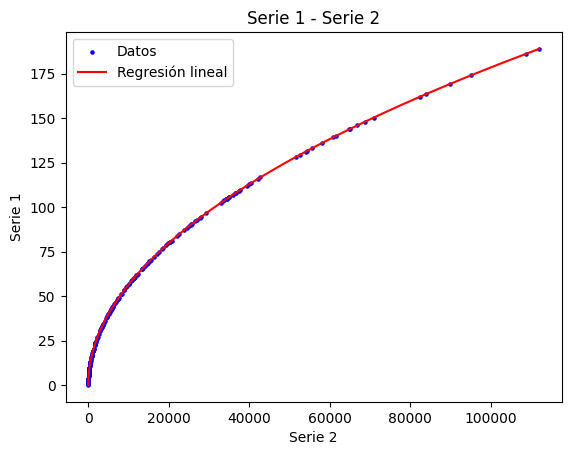

In [35]:

#Grafica original junto a su ajuste de regresión
plt.scatter(df['serie2'],df['serie1'],s = 5, c = 'b')
plt.plot(a,(b)**(1/2),color = 'r')
plt.title('Serie 1 - Serie 2')
plt.xlabel('Serie 2')
plt.ylabel('Serie 1')
plt.legend(['Datos','Regresión lineal'])
plt.show()